In [304]:
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
import sys

In [305]:
# Loading the TFLite converted model
model_path = 'C:/Users/ashiv/Downloads/3 icon predication and count/model.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [306]:
# Defining input and output details of the TFLite model
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [307]:
# Function to split an image into three pieces horizontally
def split_image(input_path, output_paths):
    img = cv2.imread(input_path)
    height, width = img.shape[:2]
    split_width = width // 3
    
    for i in range(3):
        start_x = i * split_width
        end_x = start_x + split_width
        split_img = img[:, start_x:end_x]
        cv2.imwrite(output_paths[i], split_img)

In [308]:
# Function to classify a single image
def classify_image(img_path):
    # Load and preprocess the image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = tf.keras.applications.mobilenet.preprocess_input(img_array)
    
    # Set the preprocessed image as input tensor
    interpreter.set_tensor(input_details[0]['index'], preprocessed_img)
    
    # Run inference
    start_time = time.time()
    interpreter.invoke()
    end_time = time.time()
    
    # Get the output tensor
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    # Get the class index and class name
    class_index = np.argmax(output_data[0])
    class_name = class_names[class_index]
    
    # Get the probability (accuracy) of the predicted class
    probability = output_data[0][class_index]
    
    # Return the results as a dictionary
    result = {
        'class_index': class_index,
        'class_name': class_name,
        'probability': probability,
        'inference_time': end_time - start_time
    }
    return result

In [309]:
# Function to predict an image with multiple objects
def predict(img_path):
    # Display the original image
    img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Split the image into three pieces and save them in temporary paths
    temp_paths = ['temp_1.png', 'temp_2.png', 'temp_3.png']
    split_image(img_path, temp_paths)

    # Classify each split piece and print the results
    class_indices = []
    for i in range(3):
        result = classify_image(temp_paths[i])
        print(f"Icon {i+1}:")
        print(f"Class: {result['class_name']}")
        print(f"Probability: {result['probability']:.4f}")
        class_indices.append(result['class_index'])
        print(f"Inference Time: {result['inference_time']:.5f} seconds")
        print("---------------------------")

    # Check if all the predicted class indices are the same
    if len(set(class_indices)) == 1:
        print("The icons in the row are the same.")
    else:
        print("The icons in the row are different.")

In [313]:
# Set the class names for your specific classification task
class_names = ['7', 'bar', 'bell', 'cherry', 'clown', 'grapes', 'rhino']

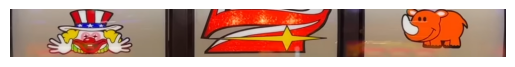

Icon 1:
Class: clown
Probability: 0.9981
Inference Time: 0.02117 seconds
---------------------------
Icon 2:
Class: 7
Probability: 1.0000
Inference Time: 0.01567 seconds
---------------------------
Icon 3:
Class: rhino
Probability: 0.9964
Inference Time: 0.03125 seconds
---------------------------
The icons in the row are different.


In [317]:
# Predicting an image
image_path = 'C:/Users/ashiv/Downloads/3 icon predication and count/test_data/9.png'
predict(image_path)